In [ ]:
import pandas as pd
import geopandas as gpd
import json

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
path = '/Users/parkchungho/Desktop/23-2/Big Data Capstone Design 1/관련자료/지형'



with open(path+'/TL_SCCO_CTPRVN.json',encoding='utf-8') as f:
    sidoGeo=json.load(f)

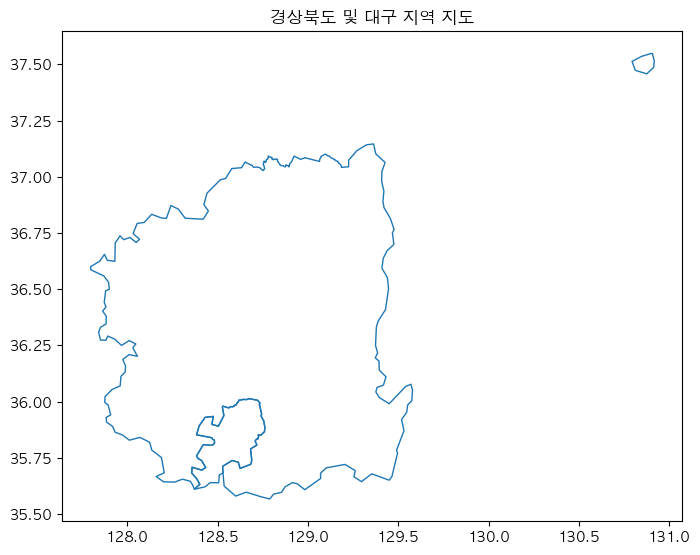

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import geopandas as gpd

# 경상북도 폴리곤 좌표
KSBD_polygon_1 = Polygon(sidoGeo['features'][3]['geometry']['coordinates'][0])
KSBD_polygon_2 = Polygon(sidoGeo['features'][3]['geometry']['coordinates'][1])

# 대구시 폴리곤 좌표
DG_polygon = Polygon(sidoGeo['features'][5]['geometry']['coordinates'][0])



# GeoDataFrame 생성
KSBD_geometry_1 = gpd.GeoDataFrame(geometry=[Polygon(KSBD_polygon_1)], crs="EPSG:4326")
KSBD_geometry_2 = gpd.GeoDataFrame(geometry=[Polygon(KSBD_polygon_2)], crs="EPSG:4326")
DG_geometry = gpd.GeoDataFrame(geometry=[Polygon(DG_polygon)], crs="EPSG:4326")

# 두 GeoDataFrame을 합침
merged_geometry = pd.concat([KSBD_geometry_1, KSBD_geometry_2, DG_geometry])

# Matplotlib로 지도 그리기
fig, ax = plt.subplots(figsize=(8, 8))
merged_geometry.boundary.plot(ax=ax, linewidth=1)
ax.set_title("경상북도 및 대구 지역 지도")
plt.show()
